In [1]:
import os 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize': (8,6)})
%matplotlib inline

from pandas import to_datetime #???
#import itertools #ok -> From itertools import products
import warnings
#import datetime #???
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split #ok
from sklearn.ensemble import RandomForestRegressor #ok
#from sklearn.metrics import accuracy_score, r2_score #ok (R2_score???)

In [2]:
#Load files to dataframe: 

main = 'C:\\Users\\joaopaulo\\Desktop\\Gla_data\\PP EPC FULL'
gla_file = os.path.join(main, 'final_merge4.csv')
gla_data = pd.read_csv(gla_file)

print(gla_data.shape) #(331654, 29) -> (853390, 52)
gla_data.head()

(871020, 37)


,index,county,district,oa11,lsoa11,msoa11,postcode,ADDRESS,lat,long,...,Fare_Zone,Deprivation_Index,driving_distance_miles,Median(£)-2011,connec_air_public,connec_air_car,connec_road_car,Gross Domestic Product: Quarter on Quarter growth: CVM SA %,"Construction, cont Q on Q yr ago",Real Estate Activities (period on period growth) %:CVM
0,1787073,GREATER LONDON,LEWISHAM,E00016638,E01003296,E02000664,SE13 5FP,"014 Brick Kiln One, Station Road",51.465100,-0.012095,...,3.0,5.850052,5.81,190000.0,0.438756,0.253657,0.434362,0.3,-0.13,0.5
1,1811124,GREATER LONDON,LEWISHAM,E00016638,E01003296,E02000664,SE13 5FL,"036 River Mill One, Station Road",51.465120,-0.012728,...,3.0,5.850052,5.81,190000.0,0.438756,0.253657,0.434362,0.7,-0.07,-0.4
2,1870838,GREATER LONDON,MERTON,E00017413,E01003447,E02000704,SW20 0AN,"1, Aboyne Drive",51.408534,-0.243936,...,4.0,3.240188,13.92,210000.0,0.360948,0.284701,0.447893,0.5,0.16,1.5
3,359864,GREATER LONDON,BROMLEY,E00003311,E01000683,E02000161,BR6 9UD,"1, Ambrose Close",51.367211,0.089848,...,6.0,-2.300779,17.67,230000.0,0.266449,0.254481,0.464440,0.6,0.23,0.3
4,1630531,GREATER LONDON,KINGSTON UPON THAMES,E00014905,E01002961,E02000605,KT3 3UY,"1, Bakewell Way",51.410950,-0.260673,...,4.0,-2.684785,14.03,460000.0,0.341132,0.289282,0.447246,0.7,0.67,1.5


In [3]:
gla_data.columns

Index(['index', 'county', 'district', 'oa11', 'lsoa11', 'msoa11', 'postcode',
       'ADDRESS', 'lat', 'long', 'property_type', 'new_build', 'duration',
       'category', 'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA',
       'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION', 'PROPERTY_TYPE',
       'BUILT_FORM', 'LODGEMENT_DATE', 'deed_date', 'year', 'quarter',
       'price_paid', 'Fare_Zone', 'Deprivation_Index',
       'driving_distance_miles', 'Median(£)-2011', 'connec_air_public',
       'connec_air_car', 'connec_road_car',
       'Gross Domestic Product: Quarter on Quarter growth: CVM SA %',
       'Construction, cont Q on Q yr ago',
       'Real Estate Activities (period on period growth) %:CVM'],
      dtype='object')

In [16]:
#checling null instances:

gla_data.isnull().sum()

index                                                               0
county                                                              0
district                                                            0
oa11                                                                0
lsoa11                                                              0
msoa11                                                              0
postcode                                                            0
ADDRESS                                                             0
lat                                                                 0
long                                                                0
property_type                                                       0
new_build                                                           0
duration                                                            0
category                                                            0
CURRENT_ENERGY_RATIN

In [17]:
#Dropping null instances:
gla_data.dropna(subset=['NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS'], inplace=True)
print(gla_data.shape)
##(331654, 29) -> 331643, 29)

(746174, 37)


In [18]:
#Limiting the data:

gla_data2 = gla_data[['quarter', 'property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'PROPERTY_TYPE', 'BUILT_FORM', 'price_paid', 'Fare_Zone',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011', 
       'Gross Domestic Product: Quarter on Quarter growth: CVM SA %',
       'Construction, cont Q on Q yr ago', 'Real Estate Activities (period on period growth) %:CVM']]

gla_data2.head()
print(gla_data2.shape)

(746174, 21)


In [19]:
#Making categorical variables into numerical representeations:

gla_data3 = pd.get_dummies(gla_data2, columns = ['property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'Fare_Zone', 'PROPERTY_TYPE', 'BUILT_FORM'])
       
gla_data3.head()

,quarter,TOTAL_FLOOR_AREA,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,MULTI_GLAZE_PROPORTION,WINDOWS_DESCRIPTION,price_paid,Deprivation_Index,driving_distance_miles,Median(£)-2011,...,PROPERTY_TYPE_2.0,PROPERTY_TYPE_3.0,PROPERTY_TYPE_4.0,PROPERTY_TYPE_5.0,BUILT_FORM_0.0,BUILT_FORM_1.0,BUILT_FORM_2.0,BUILT_FORM_3.0,BUILT_FORM_4.0,BUILT_FORM_5.0
2,2015Q3,66.00,3.0,3.0,100.0,100.0,337000.0,3.240188,13.92,210000.0,...,1,0,0,0,0,0,0,0,1,0
3,2017Q1,137.00,7.0,7.0,100.0,100.0,657000.0,-2.300779,17.67,230000.0,...,0,0,0,1,0,0,0,0,0,1
4,2010Q3,114.00,4.0,4.0,100.0,100.0,570000.0,-2.684785,14.03,460000.0,...,0,0,0,1,0,0,0,0,1,0
5,2012Q3,99.07,4.0,4.0,100.0,100.0,570000.0,-2.432610,16.01,374950.0,...,0,0,0,1,0,0,0,0,1,0
6,2018Q3,99.07,4.0,4.0,100.0,100.0,770000.0,-2.432610,16.01,374950.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
#Scale Columns, converting raw numbers in scale from zero to one.

scale_vars = ['TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'Deprivation_Index', 'driving_distance_miles']

scaler = MinMaxScaler()   
gla_data3[scale_vars] = scaler.fit_transform(gla_data3[scale_vars])
gla_data3.head()


,quarter,TOTAL_FLOOR_AREA,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,MULTI_GLAZE_PROPORTION,WINDOWS_DESCRIPTION,price_paid,Deprivation_Index,driving_distance_miles,Median(£)-2011,...,PROPERTY_TYPE_2.0,PROPERTY_TYPE_3.0,PROPERTY_TYPE_4.0,PROPERTY_TYPE_5.0,BUILT_FORM_0.0,BUILT_FORM_1.0,BUILT_FORM_2.0,BUILT_FORM_3.0,BUILT_FORM_4.0,BUILT_FORM_5.0
2,2015Q3,0.006046,0.030303,0.036145,1.0,1.0,337000.0,0.521189,0.325843,210000.0,...,1,0,0,0,0,0,0,0,1,0
3,2017Q1,0.012611,0.070707,0.084337,1.0,1.0,657000.0,0.184577,0.413624,230000.0,...,0,0,0,1,0,0,0,0,0,1
4,2010Q3,0.010484,0.040404,0.048193,1.0,1.0,570000.0,0.161249,0.328418,460000.0,...,0,0,0,1,0,0,0,0,1,0
5,2012Q3,0.009103,0.040404,0.048193,1.0,1.0,570000.0,0.176568,0.374766,374950.0,...,0,0,0,1,0,0,0,0,1,0
6,2018Q3,0.009103,0.040404,0.048193,1.0,1.0,770000.0,0.176568,0.374766,374950.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
gla_data3.columns

Index(['quarter', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'price_paid', 'Deprivation_Index', 'driving_distance_miles',
       'Median(£)-2011',
       'Gross Domestic Product: Quarter on Quarter growth: CVM SA %',
       'Construction, cont Q on Q yr ago',
       'Real Estate Activities (period on period growth) %:CVM',
       'property_type_1.0', 'property_type_3.0', 'property_type_4.0',
       'property_type_5.0', 'new_build_0.0', 'new_build_1.0', 'duration_0.0',
       'duration_1.0', 'category_1.0', 'CURRENT_ENERGY_RATING_1.0',
       'CURRENT_ENERGY_RATING_2.0', 'CURRENT_ENERGY_RATING_3.0',
       'CURRENT_ENERGY_RATING_4.0', 'CURRENT_ENERGY_RATING_5.0',
       'CURRENT_ENERGY_RATING_6.0', 'CURRENT_ENERGY_RATING_7.0',
       'Fare_Zone_1.0', 'Fare_Zone_2.0', 'Fare_Zone_3.0', 'Fare_Zone_4.0',
       'Fare_Zone_5.0', 'Fare_Zone_6.0', 'PROPERTY_TYPE_2.0',
       'PROPERTY_TYPE_3.0', 'PROPERTY_

In [22]:
#Clear memory before running: But this crashed.

#Clear Memory
# gla_data.info(verbose=False, memory_usage='deep')
gla_data2.info(verbose=False, memory_usage='deep')
# gla_data3.info(verbose=False, memory_usage='deep')
# del gla_data, gla_data2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746174 entries, 2 to 871019
Columns: 21 entries, quarter to Real Estate Activities (period on period growth) %:CVM
dtypes: float64(20), object(1)
memory usage: 164.4 MB


In [23]:
# TIME ARRAY

init_quarter = '2010-04-01'
end_quarter = '2021-09-30'
lag = 8

Q_range = pd.date_range(pd.to_datetime(init_quarter), pd.to_datetime(end_quarter), freq='Q')

range_list = []
for i in Q_range:
    I = i.to_period('Q')
    print(I, type(I), str(I))
    range_list.append(str(I))

range_array = np.array(range_list)

def array(range_q, lag):
    quarters = list()
    #Function will repeat from 2010Q1 to last quarter in list of quarters.
    for i in range_q[lag: ]: #Last element here is included, use range_q[lag: ]
        #Convert datetime64[M] to an indexable format
        qs = range_q[int(np.where(range_q == i)[0]) - lag: int(np.where(range_q == i)[0]) +1]
        quarters.append(qs)
    print(quarters)
    return quarters

2010Q2 <class 'pandas._libs.tslibs.period.Period'> 2010Q2
2010Q3 <class 'pandas._libs.tslibs.period.Period'> 2010Q3
2010Q4 <class 'pandas._libs.tslibs.period.Period'> 2010Q4
2011Q1 <class 'pandas._libs.tslibs.period.Period'> 2011Q1
2011Q2 <class 'pandas._libs.tslibs.period.Period'> 2011Q2
2011Q3 <class 'pandas._libs.tslibs.period.Period'> 2011Q3
2011Q4 <class 'pandas._libs.tslibs.period.Period'> 2011Q4
2012Q1 <class 'pandas._libs.tslibs.period.Period'> 2012Q1
2012Q2 <class 'pandas._libs.tslibs.period.Period'> 2012Q2
2012Q3 <class 'pandas._libs.tslibs.period.Period'> 2012Q3
2012Q4 <class 'pandas._libs.tslibs.period.Period'> 2012Q4
2013Q1 <class 'pandas._libs.tslibs.period.Period'> 2013Q1
2013Q2 <class 'pandas._libs.tslibs.period.Period'> 2013Q2
2013Q3 <class 'pandas._libs.tslibs.period.Period'> 2013Q3
2013Q4 <class 'pandas._libs.tslibs.period.Period'> 2013Q4
2014Q1 <class 'pandas._libs.tslibs.period.Period'> 2014Q1
2014Q2 <class 'pandas._libs.tslibs.period.Period'> 2014Q2
2014Q3 <class 

In [24]:
#Define ML function

def ML(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=800, max_depth=None, bootstrap=False, max_features='sqrt', n_jobs=5,
                               criterion='mse')
#     rf = RandomForestRegressor(n_estimators=3, max_depth=3, bootstrap=True, max_features='sqrt', n_jobs=5,
#                                criterion='mse')
    rf.fit(X_train, y_train)
    
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    
    return rf, train_score, test_score

In [25]:
#Feature importance:

def feat_imp(data, rf):
    feats = {}
    for feature, importance in zip(data.columns, rf.feature_importances_):
        feats[feature] = importance   
    return feats

In [26]:
#THIRD STEP: Parse the arrays to build index for X_train, X_test, y_train, y_test and run ML.
def X_y(time_array, dataframe):
    df_X = dataframe.drop('price_paid', axis=1) 
    df_y = dataframe[['quarter', 'price_paid']]
    print('Shape of the entire quarter dataframe: ', dataframe.shape)
    count = 0
    scores = {}
    df_predicted = pd.DataFrame()   
    df_preds = pd.DataFrame()  
    df_importances = pd.DataFrame()
    df_importances_final = pd.DataFrame()
    for i in time_array:
        count += 1
        print('QUARTER ', str(count), '.')
        print('Range of training quarters: {} to {}'.format(str(i[0]), str(i[-2])))
        print('Test quarter: ', str(i[-1]))
        
        df_X_train = df_X[(df_X['quarter'] >= i[0]) & (df_X['quarter'] <= i[-2])]
        df_X_train = df_X_train.drop('quarter', axis=1) 
        X_train_values = df_X_train.values
        X_train = np.array(X_train_values)
        print('X_train shape: ', X_train.shape)
        df_X_test = df_X[(df_X['quarter'] == i[-1])]
        df_X_test = df_X_test.drop('quarter', axis=1)
        X_test_values = df_X_test.values
        X_test = np.array(X_test_values)
        print('X_test shape: ', X_test.shape)
        df_y_train = df_y[(df_y['quarter'] >= i[0]) & ( df_y['quarter'] <= i[-2])]
        y_train_values = df_y_train['price_paid'].values
        y_train = np.array(y_train_values)
        print('y_train shape: ', y_train.shape)
        df_y_test = df_y[df_y['quarter'] == i[-1]]        
        df_y_test = df_y_test.drop('quarter', axis=1)
        y_test_values = df_y_test.values
        y_test = np.array(y_test_values)
        print('y_test shape: ', y_test.shape)

        del X_train_values,  X_test_values, df_y_train, y_train_values, y_test_values
        
        #Run Machine Learning
        rf, train_score, test_score= ML(X_train, X_test, y_train, y_test)
        print('Training accuracy score is: ', train_score)
        print('Testing accuracy score is: ', test_score)    

        predicted_pp = pd.DataFrame(rf.predict(df_X_test))
        predicted_pp.columns = ['predicted_pp']
        df_X_test = df_X_test.join(df_y_test)
        df_X_test = df_X_test.reset_index()
        df_X_test = df_X_test.join(predicted_pp)
        df_preds = pd.concat([df_preds, df_X_test])
        df_preds = df_preds[['index', 'price_paid', 'predicted_pp']]       
      
        del df_y_test, df_X_test, predicted_pp
     
        scores[i[-1]] = [train_score, test_score]
        feats = feat_imp(df_X_train, rf)
        df_importances = df_importances.assign(feats_imp = pd.Series(feats))
        df_importances = df_importances.rename(columns={'feats_imp': f'Importance {str(i[-1])}', })
        print()

    df_importances['Importances'] = df_importances.mean(axis=1)
    df_importances = df_importances.sort_values(by='Importances', ascending=False)
    df_importances.index = df_importances.index.rename('Features') 
    return scores, df_preds, df_importances

In [27]:
#Execute functions:

time_array = array(range_array, lag)

[array(['2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3',
       '2011Q4', '2012Q1', '2012Q2'], dtype='<U6'), array(['2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4',
       '2012Q1', '2012Q2', '2012Q3'], dtype='<U6'), array(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
       '2012Q2', '2012Q3', '2012Q4'], dtype='<U6'), array(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1'], dtype='<U6'), array(['2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3',
       '2012Q4', '2013Q1', '2013Q2'], dtype='<U6'), array(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4',
       '2013Q1', '2013Q2', '2013Q3'], dtype='<U6'), array(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
       '2013Q2', '2013Q3', '2013Q4'], dtype='<U6'), array(['2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
       '2013Q3', '2013Q4', '2014Q1'], dtype='<U6'), array(['2012Q2', '2012Q3', '2012Q4', '2013Q1', 

In [28]:
#Execute ML function within split function:

scores, df_preds, df_importances = X_y(time_array, gla_data3)

Shape of the entire quarter dataframe:  (746174, 45)
QUARTER  1 .
Range of training quarters: 2010Q2 to 2012Q1
Test quarter:  2012Q2
X_train shape:  (129118, 43)
X_train dtype:  float64
X_test shape:  (14845, 43)
X_test dtype:  float64
y_train shape:  (129118,)
y_train dtype:  float64
y_test shape:  (14845, 1)
y_test dtype:  float64
Training accuracy score is:  0.9999545774760128
Testing accuracy score is:  0.8128256412000926
df_X_test -> predicted_pp
Shape predicted_pp:  (14845, 1)
Non null count of predicted_pp df:  predicted_pp    14845
dtype: int64
df_X_test #########################
Shape df_X_test + joined df_y_test:  (14845, 44)
Shape df_X_test reset index:  (14845, 45)
Shape df_X_test + predicted_pp:  (14845, 46)
Non null count of predicted_pp in df_X_test:  14845
Shape df_X_test:  (14845, 46)
Shape df_preds Concatenated:  (14845, 3)
head df_preds:     index  price_paid   predicted_pp
0     31    385000.0  295410.735000
1    196     95250.0  104517.125000
2    210    465000.0  

Training accuracy score is:  0.9999538505034391
Testing accuracy score is:  0.8237740125534909
df_X_test -> predicted_pp
Shape predicted_pp:  (19810, 1)
Non null count of predicted_pp df:  predicted_pp    19810
dtype: int64
df_X_test #########################
Shape df_X_test + joined df_y_test:  (19810, 44)
Shape df_X_test reset index:  (19810, 45)
Shape df_X_test + predicted_pp:  (19810, 46)
Non null count of predicted_pp in df_X_test:  19810
Shape df_X_test:  (19810, 46)
Shape df_preds Concatenated:  (148951, 3)
head df_preds:     index  price_paid   predicted_pp
0     31    385000.0  295410.735000
1    196     95250.0  104517.125000
2    210    465000.0  431658.593750
3    356   1525000.0  990932.681250
4    442    182500.0  177099.939375
Non null count of df_preds:  index           148951
price_paid      148951
predicted_pp    148951
dtype: int64

QUARTER  9 .
Range of training quarters: 2012Q2 to 2014Q1
Test quarter:  2014Q2
X_train shape:  (148951, 43)
X_train dtype:  float64
X_t

Shape df_preds Concatenated:  (289882, 3)
head df_preds:     index  price_paid   predicted_pp
0     31    385000.0  295410.735000
1    196     95250.0  104517.125000
2    210    465000.0  431658.593750
3    356   1525000.0  990932.681250
4    442    182500.0  177099.939375
Non null count of df_preds:  index           289882
price_paid      289882
predicted_pp    289882
dtype: int64

QUARTER  16 .
Range of training quarters: 2014Q1 to 2015Q4
Test quarter:  2016Q1
X_train shape:  (160741, 43)
X_train dtype:  float64
X_test shape:  (22510, 43)
X_test dtype:  float64
y_train shape:  (160741,)
y_train dtype:  float64
y_test shape:  (22510, 1)
y_test dtype:  float64
Training accuracy score is:  0.9999858445634517
Testing accuracy score is:  0.833100063186103
df_X_test -> predicted_pp
Shape predicted_pp:  (22510, 1)
Non null count of predicted_pp df:  predicted_pp    22510
dtype: int64
df_X_test #########################
Shape df_X_test + joined df_y_test:  (22510, 44)
Shape df_X_test reset i


QUARTER  23 .
Range of training quarters: 2015Q4 to 2017Q3
Test quarter:  2017Q4
X_train shape:  (132114, 43)
X_train dtype:  float64
X_test shape:  (14922, 43)
X_test dtype:  float64
y_train shape:  (132114,)
y_train dtype:  float64
y_test shape:  (14922, 1)
y_test dtype:  float64
Training accuracy score is:  0.9999657937641059
Testing accuracy score is:  0.7019912258103697
df_X_test -> predicted_pp
Shape predicted_pp:  (14922, 1)
Non null count of predicted_pp df:  predicted_pp    14922
dtype: int64
df_X_test #########################
Shape df_X_test + joined df_y_test:  (14922, 44)
Shape df_X_test reset index:  (14922, 45)
Shape df_X_test + predicted_pp:  (14922, 46)
Non null count of predicted_pp in df_X_test:  14922
Shape df_X_test:  (14922, 46)
Shape df_preds Concatenated:  (416463, 3)
head df_preds:     index  price_paid   predicted_pp
0     31    385000.0  295410.735000
1    196     95250.0  104517.125000
2    210    465000.0  431658.593750
3    356   1525000.0  990932.681250


y_train shape:  (113282,)
y_train dtype:  float64
y_test shape:  (16351, 1)
y_test dtype:  float64
Training accuracy score is:  0.9999838776117144
Testing accuracy score is:  0.8253793507383758
df_X_test -> predicted_pp
Shape predicted_pp:  (16351, 1)
Non null count of predicted_pp df:  predicted_pp    16351
dtype: int64
df_X_test #########################
Shape df_X_test + joined df_y_test:  (16351, 44)
Shape df_X_test reset index:  (16351, 45)
Shape df_X_test + predicted_pp:  (16351, 46)
Non null count of predicted_pp in df_X_test:  16351
Shape df_X_test:  (16351, 46)
Shape df_preds Concatenated:  (514573, 3)
head df_preds:     index  price_paid   predicted_pp
0     31    385000.0  295410.735000
1    196     95250.0  104517.125000
2    210    465000.0  431658.593750
3    356   1525000.0  990932.681250
4    442    182500.0  177099.939375
Non null count of df_preds:  index           514573
price_paid      514573
predicted_pp    514573
dtype: int64

QUARTER  31 .
Range of training quart

Shape predicted_pp:  (5775, 1)
Non null count of predicted_pp df:  predicted_pp    5775
dtype: int64
df_X_test #########################
Shape df_X_test + joined df_y_test:  (5775, 44)
Shape df_X_test reset index:  (5775, 45)
Shape df_X_test + predicted_pp:  (5775, 46)
Non null count of predicted_pp in df_X_test:  5775
Shape df_X_test:  (5775, 46)
Shape df_preds Concatenated:  (604161, 3)
head df_preds:     index  price_paid   predicted_pp
0     31    385000.0  295410.735000
1    196     95250.0  104517.125000
2    210    465000.0  431658.593750
3    356   1525000.0  990932.681250
4    442    182500.0  177099.939375
Non null count of df_preds:  index           604161
price_paid      604161
predicted_pp    604161
dtype: int64

QUARTER  38 .
Range of training quarters: 2019Q3 to 2021Q2
Test quarter:  2021Q3
X_train shape:  (105939, 43)
X_train dtype:  float64
X_test shape:  (33, 43)
X_test dtype:  float64
y_train shape:  (105939,)
y_train dtype:  float64
y_test shape:  (33, 1)
y_test dty

In [29]:
df_importances.to_csv(os.path.join(main, 'df_importances.csv'), encoding='utf-8')

In [30]:
#Print training and test scores dictionary:

print(scores)
print(type(scores))

{'2012Q2': [0.9999545774760128, 0.8128256412000926], '2012Q3': [0.9999639633747973, 0.7896021039555388], '2012Q4': [0.9999652168331364, 0.8067235459551004], '2013Q1': [0.9999658494318538, 0.8111703085597939], '2013Q2': [0.9999361242586345, 0.7975791799933032], '2013Q3': [0.9999402008657106, 0.8194379556877331], '2013Q4': [0.9999492567741894, 0.7937113492455031], '2014Q1': [0.9999538505034391, 0.8237740125534909], '2014Q2': [0.9999691631697095, 0.8055070704160692], '2014Q3': [0.9999617887276737, 0.834467829141862], '2014Q4': [0.999965236396839, 0.7442936592728546], '2015Q1': [0.9999670676635727, 0.8433230932777844], '2015Q2': [0.9999856141295248, 0.8306989124174323], '2015Q3': [0.9999862496854928, 0.8317833312618944], '2015Q4': [0.9999863894482429, 0.7945071377268227], '2016Q1': [0.9999858445634517, 0.833100063186103], '2016Q2': [0.9999720738453715, 0.8600454975406046], '2016Q3': [0.9999774221313502, 0.8350663100136833], '2016Q4': [0.9999740655743945, 0.8295434480944877], '2017Q1': [0.9

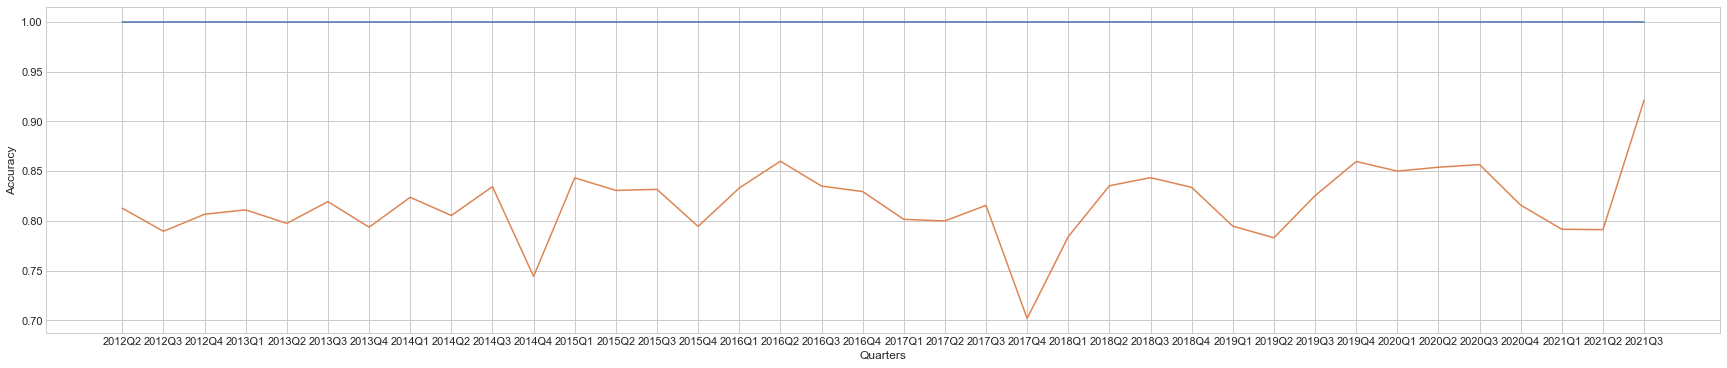

In [31]:

plt.style.use('seaborn-whitegrid')

# fig = plt.figure()
# ax = plt.axes()
fig, ax = plt.subplots(1, figsize=(30,6))

plt.plot(scores.keys(), scores.values())
plt.xlabel('Quarters')
plt.ylabel('Accuracy')
plt.show()


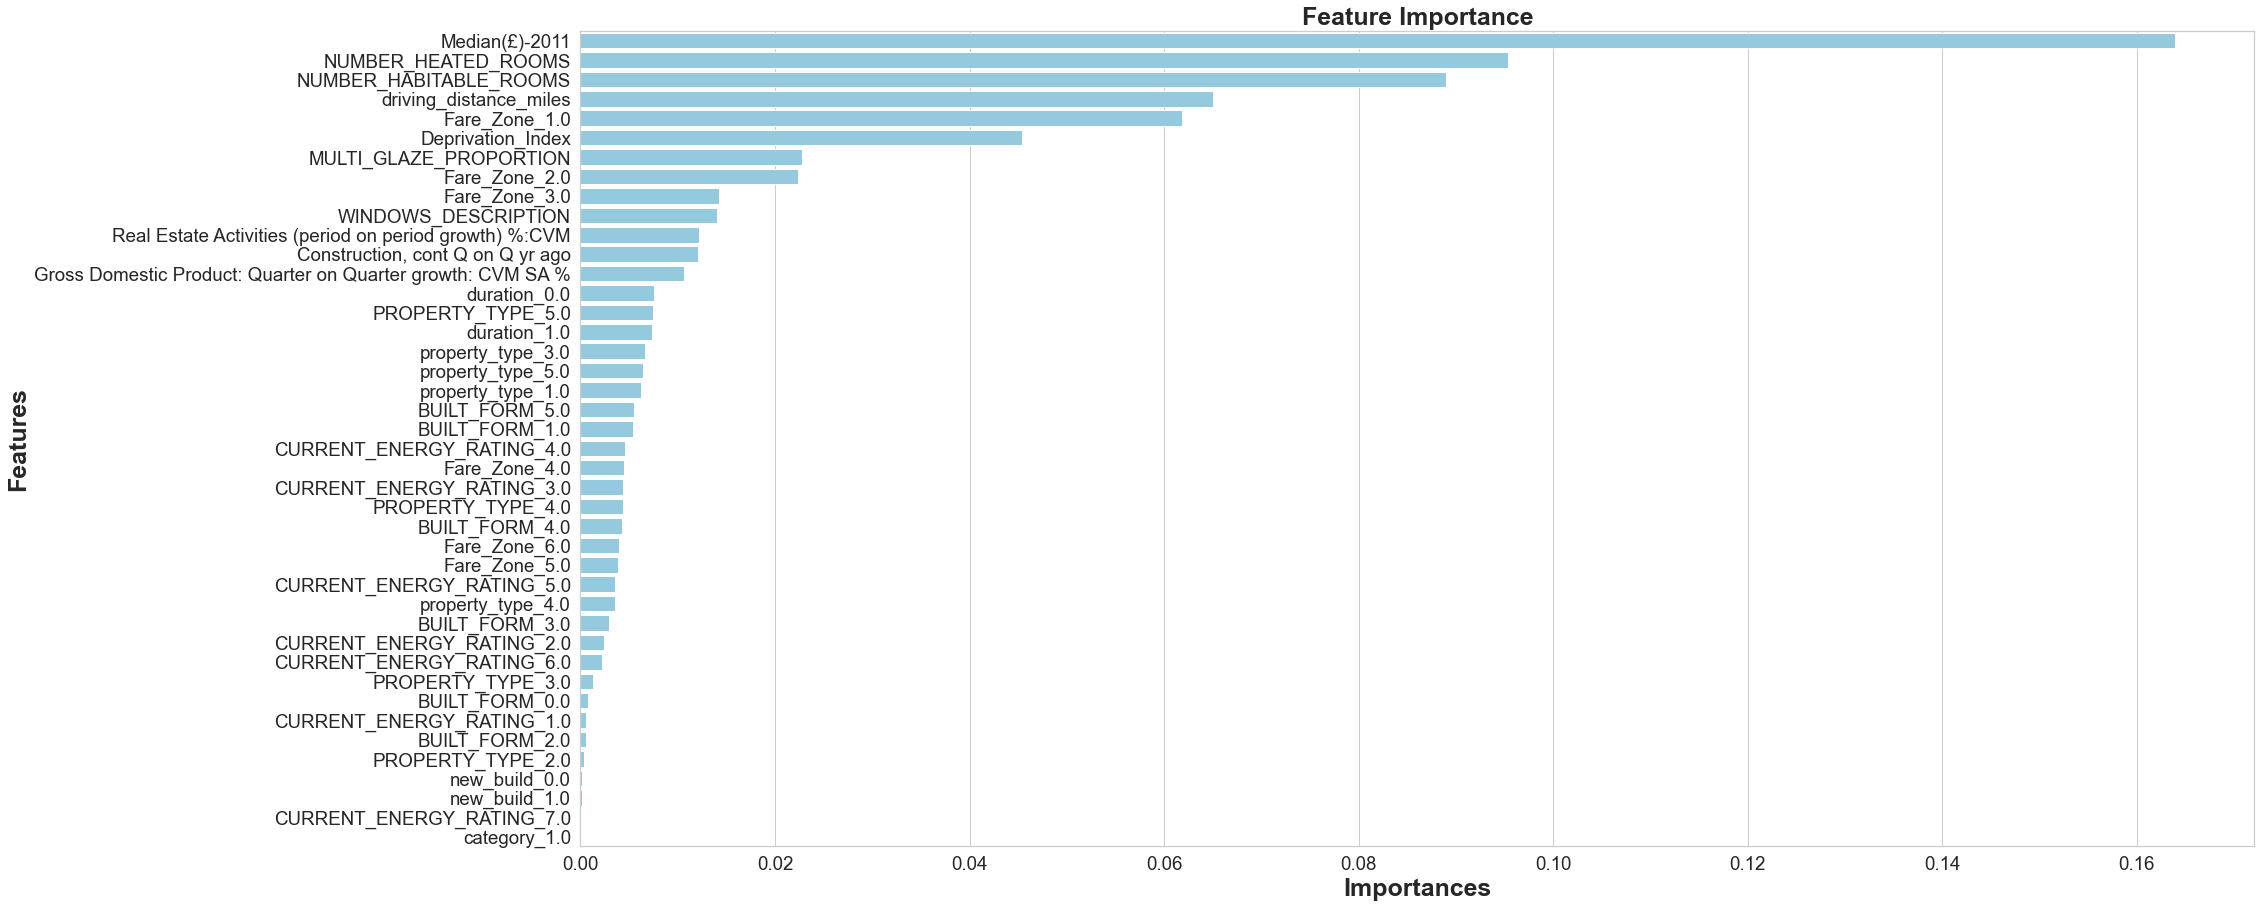

None

,Features,Importances
1,Median(£)-2011,0.163895
2,NUMBER_HEATED_ROOMS,0.095366
3,NUMBER_HABITABLE_ROOMS,0.089031
4,driving_distance_miles,0.065068
5,Fare_Zone_1.0,0.061857
6,Deprivation_Index,0.045363
7,MULTI_GLAZE_PROPORTION,0.022748
8,Fare_Zone_2.0,0.022322
9,Fare_Zone_3.0,0.014253
10,WINDOWS_DESCRIPTION,0.014059


In [32]:
#Plot Feature importances:

df_importances = pd.read_csv(os.path.join(main, 'df_importances.csv'))
df_importances = df_importances[['Features', 'Importances']]
df_importances.set_index('Features')
df_importances = df_importances.drop(0)

sns.set(font_scale = 5)
sns.set(style = 'whitegrid', color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(x=df_importances['Importances'], y=df_importances['Features'], data=df_importances, color = 'skyblue')
plt.xlabel('Importances', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

display(plt.show())
display(df_importances)

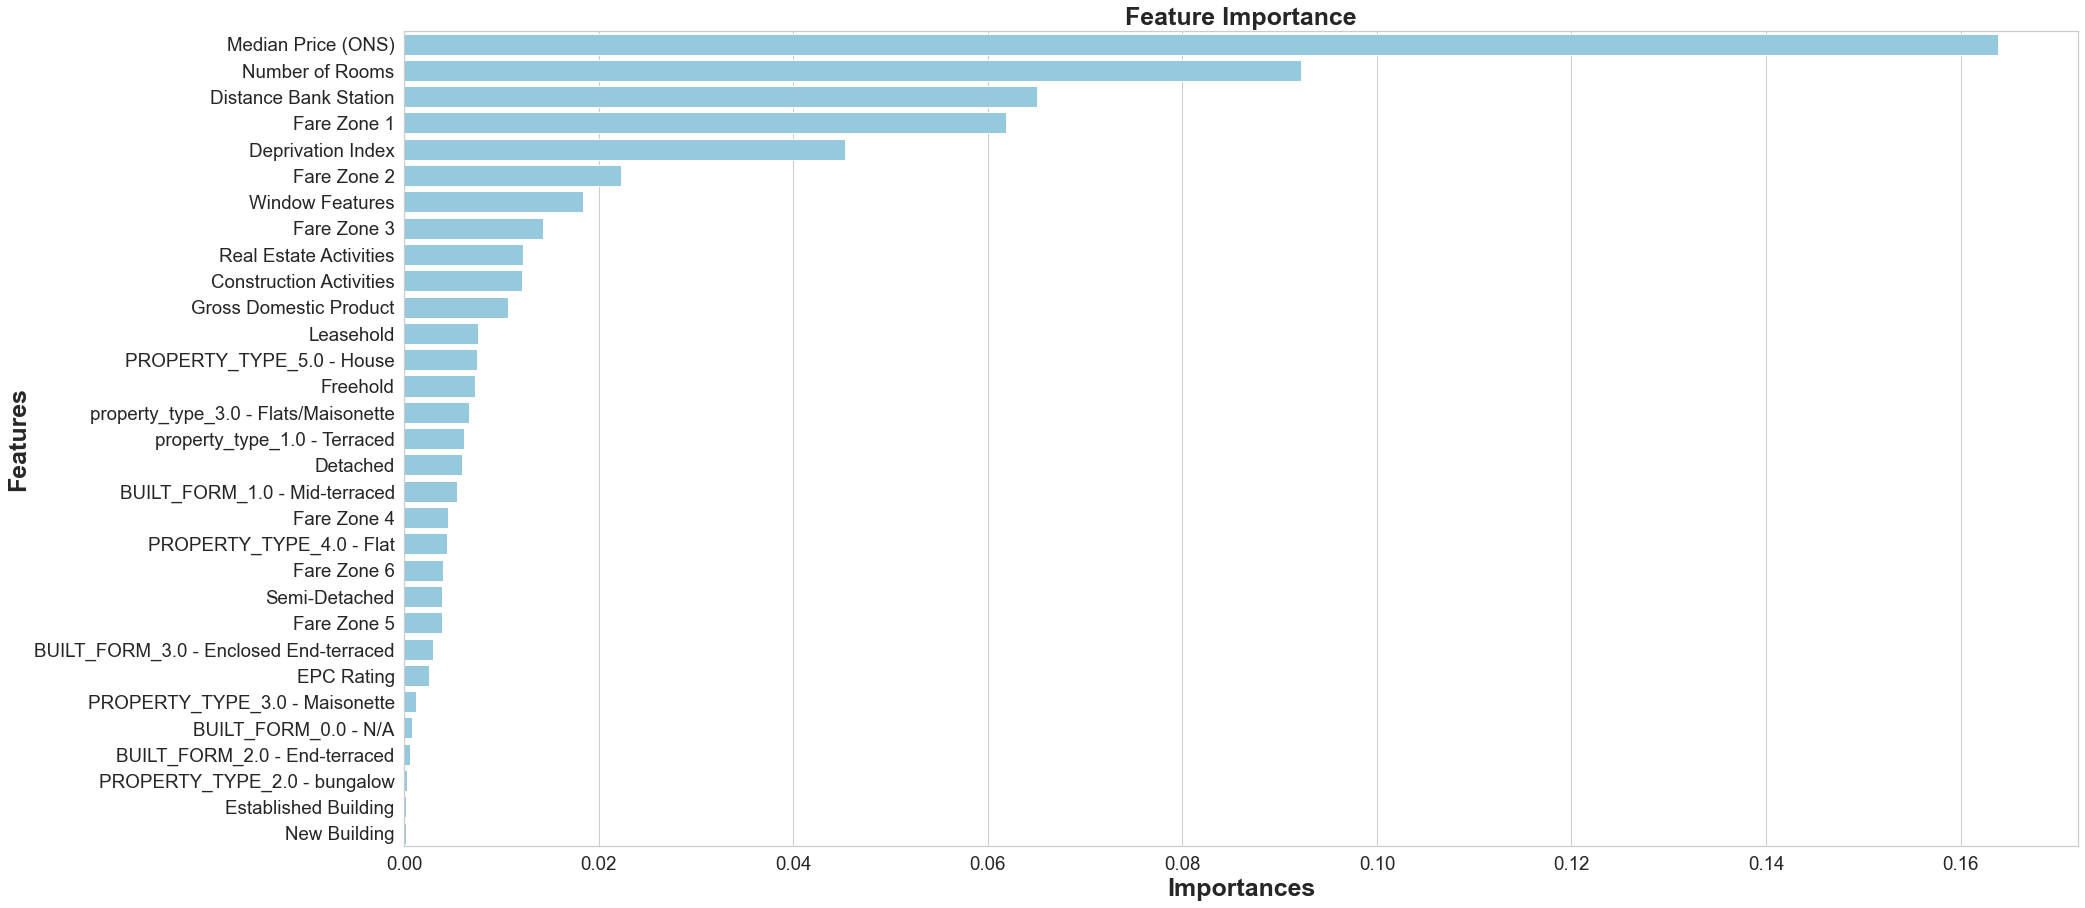

None

,Features,Importances
1,Median Price (ONS),0.163895
2,Number of Rooms,0.092199
3,Distance Bank Station,0.065068
4,Fare Zone 1,0.061857
5,Deprivation Index,0.045363
6,Fare Zone 2,0.022322
7,Window Features,0.018404
8,Fare Zone 3,0.014253
9,Real Estate Activities,0.012194
10,Construction Activities,0.012135


In [5]:
#Plot Feature importances (Second version averaging attributes in groups and renaming):

df_importances = pd.read_csv(os.path.join(main, 'df_importances 2.csv'))
df_importances = df_importances[['Features', 'Importances']]
df_importances.set_index('Features')
df_importances = df_importances.drop(0)

sns.set(font_scale = 5)
sns.set(style = 'whitegrid', color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(x=df_importances['Importances'], y=df_importances['Features'], data=df_importances, color = 'skyblue')
plt.xlabel('Importances', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

display(plt.show())
display(df_importances)

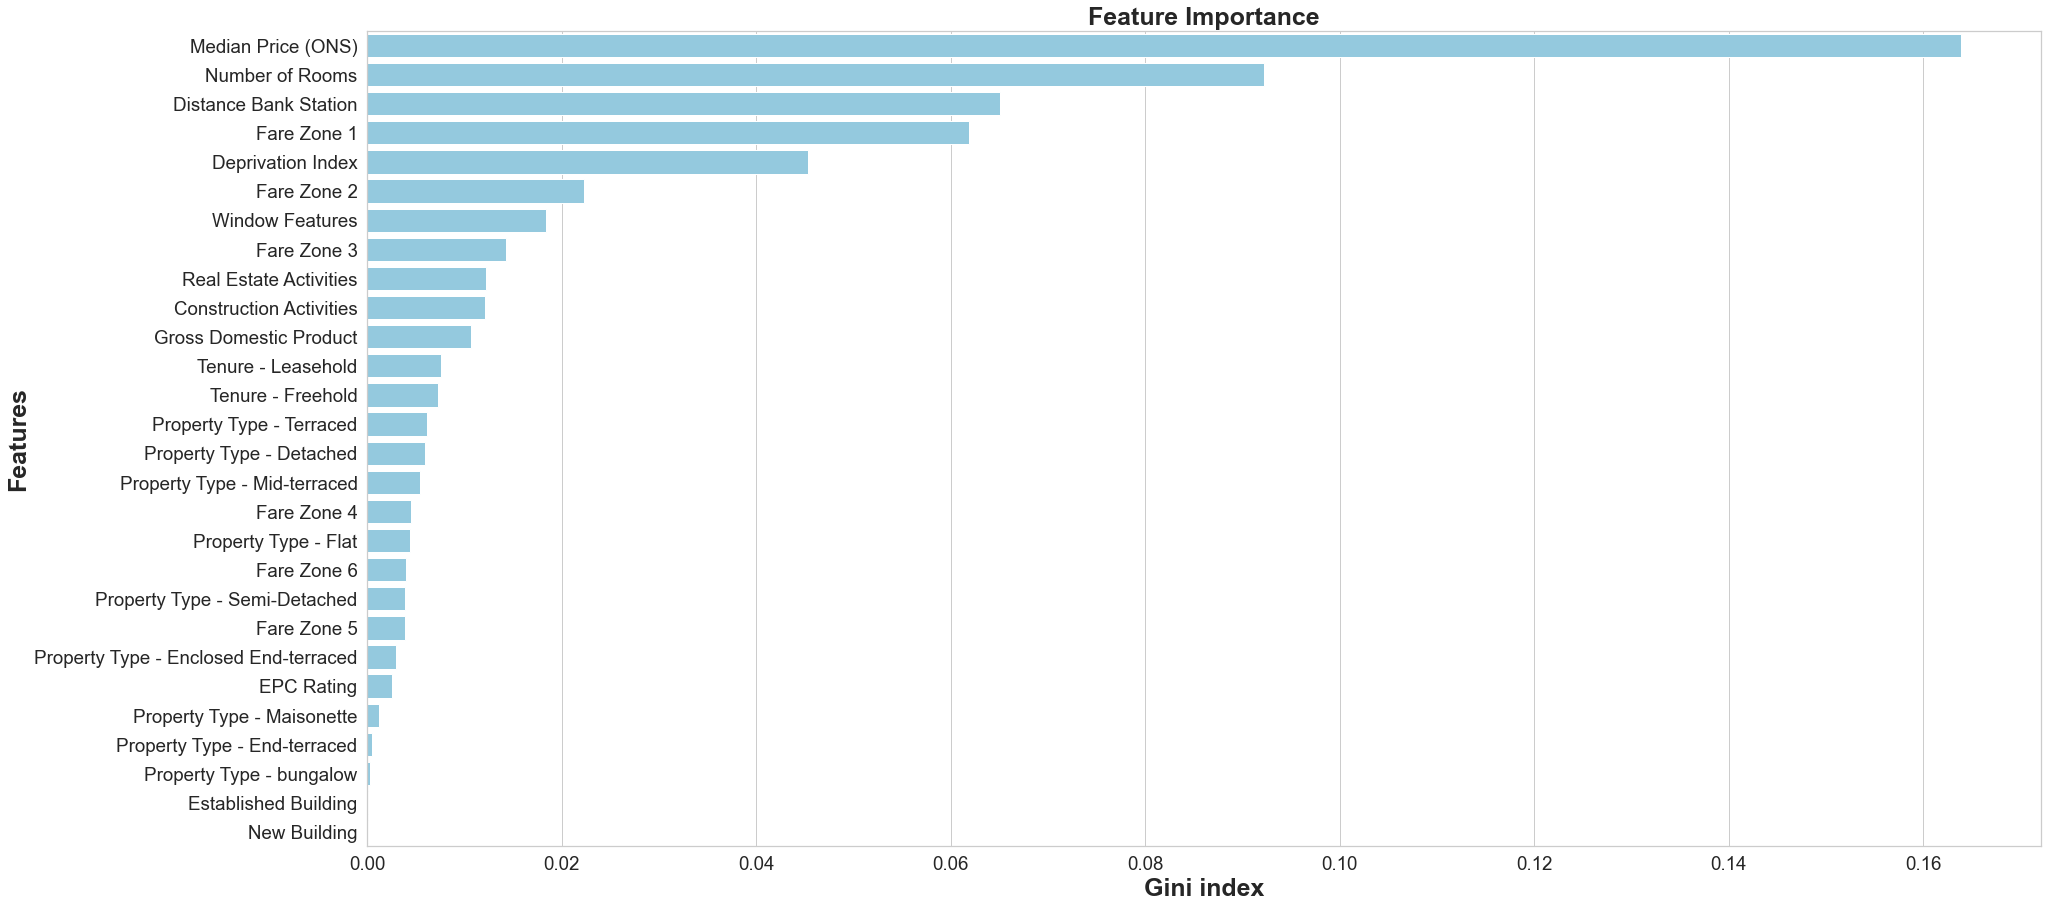

None

,Features,Importances
1,Median Price (ONS),0.163895
2,Number of Rooms,0.092199
3,Distance Bank Station,0.065068
4,Fare Zone 1,0.061857
5,Deprivation Index,0.045363
6,Fare Zone 2,0.022322
7,Window Features,0.018404
8,Fare Zone 3,0.014253
9,Real Estate Activities,0.012194
10,Construction Activities,0.012135


In [9]:
#Plot Feature importances (Third version averaging attributes in groups and renaming):

df_importances = pd.read_csv(os.path.join(main, 'df_importances 3.csv'))
df_importances = df_importances[['Features', 'Importances']]
df_importances.set_index('Features')
df_importances = df_importances.drop(0)

sns.set(font_scale = 5)
sns.set(style = 'whitegrid', color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(x=df_importances['Importances'], y=df_importances['Features'], data=df_importances, color = 'skyblue')
plt.xlabel('Gini index', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

display(plt.show())
display(df_importances)

In [ ]:
#Seaborn time-chart for top features: measure how features behave in time.
    #for later...
    







In [33]:
# Compare and join ML results to a comparative Dataframe and CSV file
#Prices will have to match along the rows, for prices_paid, gla, and gla3.
#This check will assure that the indexes are being parsed and predictions assigned correctly.

#Parsing the prices paid columns found on gla, gla3, machine learning data to check indexes.
gla_data_compare = gla_data[['county', 'district', 'oa11', 'lsoa11',
       'msoa11', 'postcode', 'ADDRESS', 'price_paid']]
gla_data_compare.rename(columns={'price_paid': 'price_paid_gla'}, inplace=True)

gla_data3_compare = pd.DataFrame()
gla_data3_compare['price_paid_gla3'] = gla_data3['price_paid']
gla_data_compare = gla_data_compare.join(gla_data3_compare)

print('Shape gla_data_compare: ', gla_data_compare.shape)
print('Shape df_compare_index init: ', gla_data_compare.shape)
print('Shape df_preds: ', df_preds.shape)
print('Columns of df_preds: ', df_preds.columns)
print('Non null count of predicted_pp in df_preds: ', df_preds['predicted_pp'].notnull().sum())

####
#df_compare_index = df_preds.join(gla_data_compare)
df_compare_index = pd.merge(df_preds, gla_data_compare, left_on='index', right_index=True)
print('Non null count of df_compare_index: ', df_compare_index.notnull().sum())
####
df_compare_index.rename(columns = {'price_paid': 'price_paid_df_y_test'}, inplace=True)
df_compare_index = df_compare_index[['county', 'district', 'oa11', 'lsoa11',
       'msoa11', 'postcode', 'ADDRESS', 'price_paid_gla', 'price_paid_gla3', 
                                     'price_paid_df_y_test', 'predicted_pp']]
print('Shape df_compare_index final: ', gla_data_compare.shape)

#Merging dataframes resulted in NaN instances for predicted prices of ML. Deleting NaN to calculate average and
   #statistical data for higher areas.
df_compare_index.dropna(subset=['predicted_pp'], inplace=True)
print('Shape df_compare_index final after dropping NaN: ', gla_data_compare.shape)

#Calculating statistical data (This is simple math, just to test the algorithm, so later will be refined)
df_compare_index['difference'] = abs((df_compare_index['predicted_pp']-df_compare_index['price_paid_gla'])/df_compare_index['price_paid_gla'])

#Parsing statistical data to higher areas as mean()
groups = {'oa11', 'lsoa11', 'msoa11', 'postcode'}
for i in groups:
    mean = df_compare_index.groupby((str(i)), as_index=False)['difference'].mean()
    mean.rename(columns={'difference': 'difference {}'.format(str(i))}, inplace=True)
    df_compare_index = pd.merge(df_compare_index, mean, on=str(i), how='left')
    del mean

# price_paid_gla, price_paid_gla3, price_paid_df_y_test rows have all to match:
print(df_compare_index.shape)
# print(df_compare_index.head())

#Saving Results for future analysis:
df_compare_index.to_csv(os.path.join(main, 'df_compare_index.csv'), encoding='utf-8')

Shape gla_data_compare:  (746174, 9)
Shape df_compare_index init:  (746174, 9)
Shape df_preds:  (604194, 3)
Columns of df_preds:  Index(['index', 'price_paid', 'predicted_pp'], dtype='object')
Non null count of predicted_pp in df_preds:  604194
Non null count of df_compare_index:  index              604194
price_paid         604194
predicted_pp       604194
county             604194
district           604194
oa11               604194
lsoa11             604194
msoa11             604194
postcode           604194
ADDRESS            604194
price_paid_gla     604194
price_paid_gla3    604194
dtype: int64
Shape df_compare_index final:  (746174, 9)
Shape df_compare_index final after dropping NaN:  (746174, 9)
(604194, 16)
